In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from numpy import exp, pi, sqrt, e, sin, log
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline



# Устанавливаем шрифт CMU Serif
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 12

In [11]:
x = np.linspace(-np.pi, np.pi, 300)

x1 = np.linspace(-np.pi, -np.pi/2, 100)
x2 = np.linspace(-np.pi/2, np.pi/2, 100)
x3 = np.linspace(np.pi/2, np.pi, 100)

y =     [0 for _ in x1] + [np.cos(x_) for x_ in x2] + [0 for _ in x3]
y_dif = [0 for _ in x1] + [-np.sin(x_) for x_ in x2] + [0 for _ in x3]
y_int = [0 for _ in x1] + [np.sin(x_) for x_ in x2] + [0 for _ in x3]

In [12]:
y_pila = [0, 0, 1, 0, 0]
x_pila = [-np.pi, -np.pi/2, np.pi/2, np.pi/2, np.pi]
y_pila_dif = [0, 0, -1, 0, 0]
x_pila_dif = [-np.pi, np.pi/2,np.pi/2,np.pi/2, np.pi]

x_pila_int = [-np.pi / 2, 0.2] + [_ for _ in np.linspace(0.2, np.pi/2, 100)] + [np.pi/2, np.pi]
y_pila_int = [np.pi ** 2 / 4, 0] + [x_**2 for x_ in np.linspace(0, np.pi/2, 100)] + [np.pi ** 2 / 4, 0]
np.pi ** 2 / 4

2.4674011002723395

In [13]:
y_tr = [0, 1, 0, 1, 0, 1]
x_tr = [-1.5, -1, -0.5, 0, 0.5, 1]

y_tr_dif = [   1,  1,   -1,   -1,    1, 1,  -1,  -1,  1,   1]
x_tr_dif = [-1.5, -1,   -1, -0.5, -0.5, 0,   0, 0.5,  0.5, 1]

x_tr_int = np.linspace(-1.5, 1, 500)
y_tr_int = [(dl + 1.5)**2 for dl in np.linspace(-1.5, -1, 100)] + [(dl + 0.5)**2 for dl in np.linspace(-1, -0.5, 100)] + \
    [(dl + 0.5)**2 for dl in np.linspace(-0.5, 0, 100)] + [(dl - 0.5)**2 for dl in np.linspace(0, 0.5, 100)] + \
    [(dl - 0.5)**2 for dl in np.linspace(0.5, 1, 100)]
max(y_pila_int),min(y_pila_int)

(2.4674011002723395, 0)

In [14]:
y_meandr = [   1,  1,   0,   0,    1, 1,  0,  0,  1,   1]
x_meandr = [-1.5, -1,   -1, -0.5, -0.5, 0,   0, 0.5,  0.5, 1]

y_meandr_dif = [   0,  0, -1,  0,    0,    1,    0,  0, -1,  0,    0,    1,    0,   0]
x_meandr_dif = [-1.5, -1, -1, -1, -0.5, -0.5, -0.5,  0,  0,  0,  0.5,  0.5,  0.5,   1]

y_meandr_int = [-0.5, 0.5, -0.5, 0.5, -0.5, 0.5]
x_meandr_int = [-1.5, -1, -0.5, 0, 0.5, 1]

findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'C

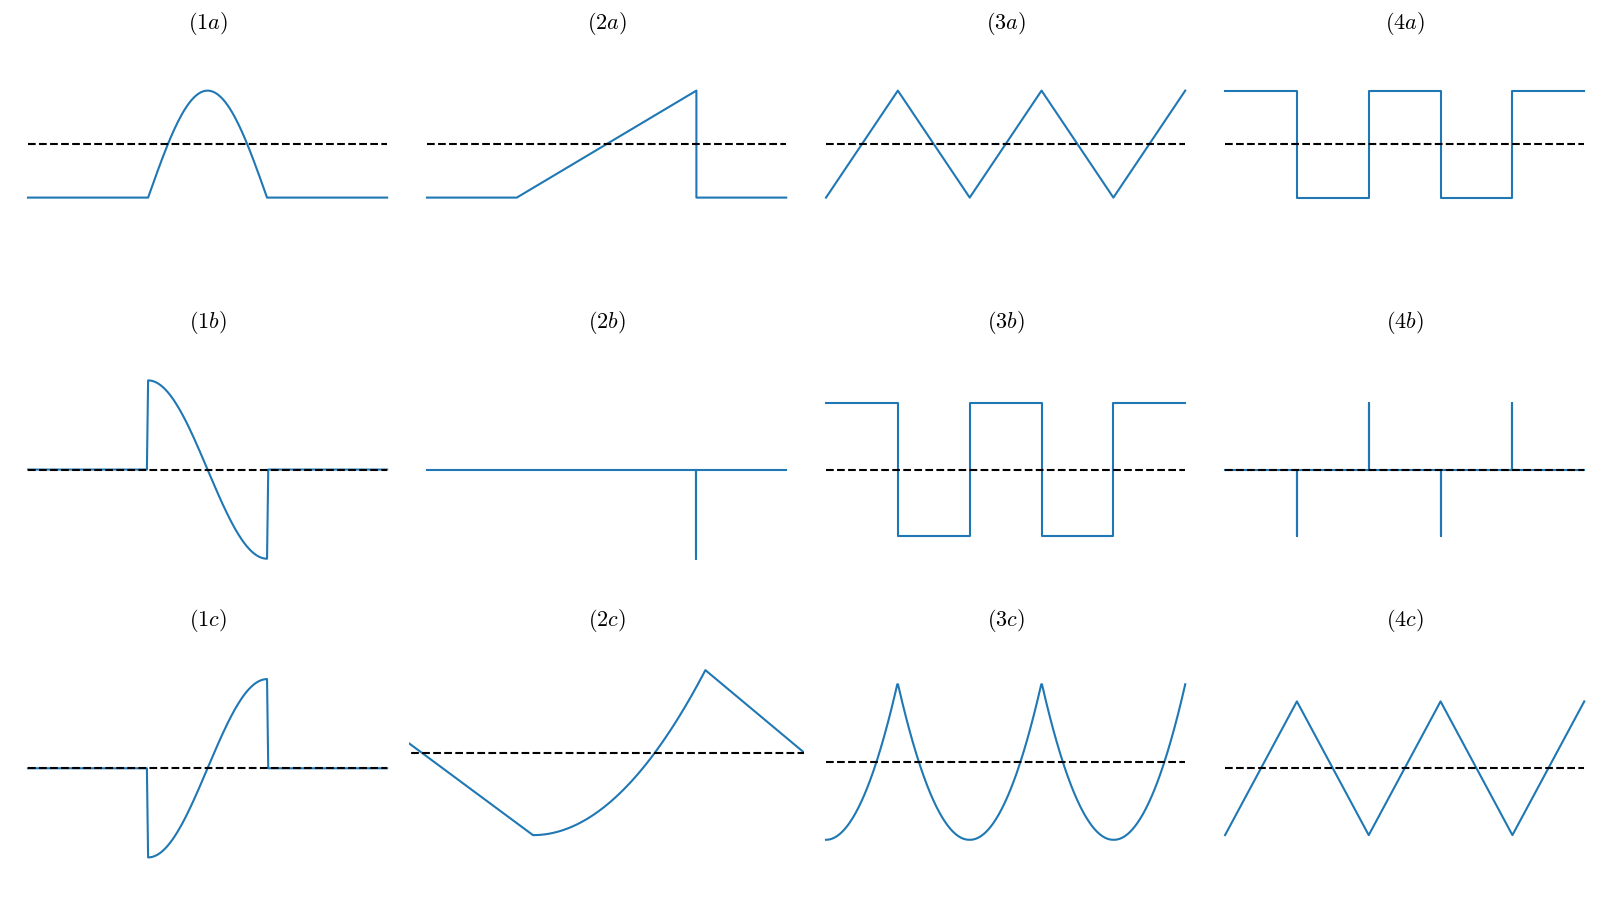

In [15]:
with PdfPages("theory_charts_int_dif.pdf") as pdf:
    figure, axes = plt.subplots(3, 4)

    figure.set_size_inches(16,9)

    # Синусойда
    axes[0][0].axis('off')
    axes[1][0].axis('off')
    axes[2][0].axis('off')

    axes[0][0].set_ylim(-1, 1.5)
    axes[1][0].set_ylim(-1.5, 1.5)
    axes[2][0].set_ylim(-1.5, 1.5)

    axes[0][0].plot(x, y)
    axes[0][0].plot([min(x), max(x)], [0.5, 0.5], linestyle = 'dashed', color='black')
    axes[0][0].set_title("$(1a)$")

    axes[1][0].plot(x, y_dif)
    axes[1][0].plot([min(x), max(x)], [0, 0], linestyle = 'dashed', color='black')
    axes[1][0].set_title("$(1b)$")

    axes[2][0].plot(x, y_int)
    axes[2][0].plot([min(x), max(x)], [0, 0], linestyle = 'dashed', color='black')
    axes[2][0].set_title("$(1c)$")

    # Пила

    axes[0][1].axis('off')
    axes[1][1].axis('off')
    axes[2][1].axis('off')

    axes[0][1].set_ylim(-1, 1.5)
    axes[1][1].set_ylim(-1.5, 1.5)
    axes[2][1].set_ylim(-1, 3)
    axes[2][1].set_xlim(-np.pi/4, 3*np.pi / 4)

    axes[0][1].plot(x_pila, y_pila)
    axes[0][1].plot([-np.pi, np.pi], [0.5, 0.5], linestyle = 'dashed', color='black')
    axes[0][1].set_title("$(2a)$")

    axes[1][1].plot(x_pila_dif, y_pila_dif)
    axes[1][1].set_title("$(2b)$")

    axes[2][1].plot(x_pila_int, y_pila_int)
    axes[2][1].plot([-np.pi, np.pi], [np.pi**2 / 8, np.pi**2/ 8], linestyle = 'dashed', color='black')
    axes[2][1].set_title("$(2c)$")

    # Треугольник

    axes[0][2].axis('off')
    axes[1][2].axis('off')
    axes[2][2].axis('off')

    axes[0][2].set_ylim(-1, 1.5)
    axes[1][2].set_ylim(-2, 2)
    axes[2][2].set_ylim(-0.1, 0.33)

    axes[0][2].plot(x_tr, y_tr)
    axes[0][2].plot([-1.5, 1], [0.5, 0.5], linestyle = 'dashed', color='black')
    axes[0][2].set_title("$(3a)$")


    axes[1][2].plot(x_tr_dif, y_tr_dif)
    axes[1][2].plot([-1.5, 1], [0, 0], linestyle = 'dashed', color='black')
    axes[1][2].set_title("$(3b)$")

    axes[2][2].plot(x_tr_int, y_tr_int)
    axes[2][2].plot([-1.5, 1], [0.125, 0.125], linestyle = 'dashed', color='black')
    axes[2][2].set_title("$(3c)$")

    # Квадрат

    axes[0][3].axis('off')
    axes[1][3].axis('off')
    axes[2][3].axis('off')

    axes[0][3].set_ylim(-1, 1.5)
    axes[1][3].set_ylim(-2, 2)
    axes[2][3].set_ylim(-1, 1)

    axes[0][3].plot(x_meandr, y_meandr)
    axes[0][3].plot([-1.5, 1], [0.5, 0.5], linestyle = 'dashed', color='black')
    axes[0][3].set_title("$(4a)$")


    axes[1][3].plot(x_meandr_dif, y_meandr_dif)
    axes[1][3].plot([-1.5, 1], [0, 0], linestyle = 'dashed', color='black')
    axes[1][3].set_title("$(4b)$")

    axes[2][3].plot(x_meandr_int, y_meandr_int)
    axes[2][3].plot([-1.5, 1], [0, 0], linestyle = 'dashed', color='black')
    axes[2][3].set_title("$(4c)$")
    
    plt.tight_layout(pad=0.2)  # Увеличенный отступ
    pdf.savefig(bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

In [16]:
figure.savefig('theory_charts_int_dif.pdf', dpi=300, transparent=True)

findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: 